In [138]:
%pip install textblob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

imdb_top_1000 = pd.read_csv('imdb_top_1000.csv')
movies_data = pd.read_csv('movies_data.csv')

Note: you may need to restart the kernel to use updated packages.


In [139]:
imdb_top_1000.head(), movies_data.head()

(                                         Poster_Link  \
 0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
 1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
 2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
 3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
 4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
 
                Series_Title Released_Year Certificate  Runtime  \
 0  The Shawshank Redemption          1994           A  142 min   
 1             The Godfather          1972           A  175 min   
 2           The Dark Knight          2008          UA  152 min   
 3    The Godfather: Part II          1974           A  202 min   
 4              12 Angry Men          1957           U   96 min   
 
                   Genre  IMDB_Rating  \
 0                 Drama          9.3   
 1          Crime, Drama          9.2   
 2  Action, Crime, Drama          9.0   
 3          Crime, Drama          9.0   
 4          Crime, Drama          9.0   
 
    

In [140]:
imdb_top_1000.columns , movies_data.columns

(Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
        'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
        'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
       dtype='object'),
 Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
        'Subgenre', 'Subgenre 1', 'IMDB_Rating', 'Meta_score', 'Director',
        'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
       dtype='object'))

In [141]:
imdb_top_1000.info(), movies_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
<class 'pandas.core.frame.DataFrame'>

(None, None)

# Limpieza y Preprocesamiento de Datos
## Antes de comenzar con el análisis, necesitamos limpiar y preprocesar los datos. Esto incluye manejar los valores faltantes, convertir los tipos de datos y extraer información útil de las columnas existentes.

In [142]:
# Convertir 'Released_Year' a entero
imdb_top_1000['Released_Year'] = imdb_top_1000['Released_Year'].str.extract(r'(\d+)').astype(float)
movies_data['Released_Year'] = movies_data['Released_Year'].str.extract(r'(\d+)').astype(float)

# Convertir 'Runtime' a entero
imdb_top_1000['Runtime'] = imdb_top_1000['Runtime'].str.extract(r'(\d+)').astype(float)

# Convertir 'Gross' a numérico, eliminando comas
imdb_top_1000['Gross'] = imdb_top_1000['Gross'].str.replace(',', '').astype(float)
movies_data['Gross'] = movies_data['Gross'].astype(float)

# Rellenar los valores faltantes en 'Meta_score' con la media
imdb_top_1000['Meta_score'] = imdb_top_1000['Meta_score'].fillna(imdb_top_1000['Meta_score'].mean())
movies_data['Meta_score'] = movies_data['Meta_score'].fillna(movies_data['Meta_score'].mean())

# Verificar los datos limpios
imdb_top_1000.head(), movies_data.head()


(                                         Poster_Link  \
 0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
 1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
 2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
 3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
 4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
 
                Series_Title  Released_Year Certificate  Runtime  \
 0  The Shawshank Redemption         1994.0           A    142.0   
 1             The Godfather         1972.0           A    175.0   
 2           The Dark Knight         2008.0          UA    152.0   
 3    The Godfather: Part II         1974.0           A    202.0   
 4              12 Angry Men         1957.0           U     96.0   
 
                   Genre  IMDB_Rating  \
 0                 Drama          9.3   
 1          Crime, Drama          9.2   
 2  Action, Crime, Drama          9.0   
 3          Crime, Drama          9.0   
 4          Crime, Drama          9.0   



# Análisis Exploratorio de Datos¶
## Ahora que nuestros datos están limpios, exploremoslos para descubrir información interesante.
# 4.1 Análisis de Géneros
## Comencemos analizando la distribución de los géneros de las películas

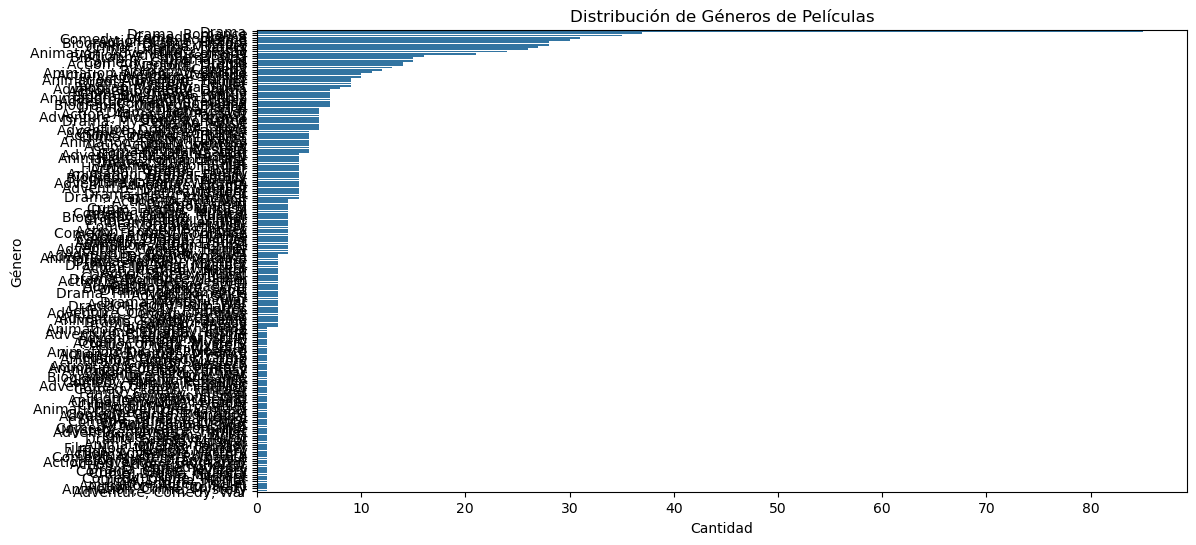

In [143]:
# Graficar la distribución de los géneros
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=imdb_top_1000, order=imdb_top_1000['Genre'].value_counts().index)
plt.title('Distribución de Géneros de Películas')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.show()


In [144]:
# Contar la cantidad de películas por género
genre_counts = imdb_top_1000['Genre'].value_counts()

# Mostrar los géneros con la mayor cantidad de películas
print(genre_counts.head())


Genre
Drama                     85
Drama, Romance            37
Comedy, Drama             35
Comedy, Drama, Romance    31
Action, Crime, Drama      30
Name: count, dtype: int64



# 4.2 Análisis de Directores y Estrellas¶
## A continuación, analicemos cuáles directores y estrellas aparecen con mayor frecuencia en las 1000 mejores películas.

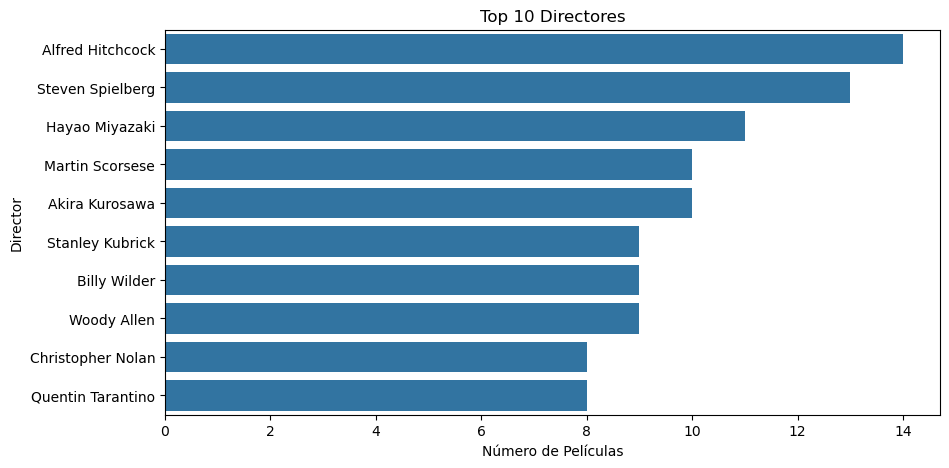

In [146]:
# Top 10 directores
top_directors = imdb_top_1000['Director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directores')
plt.xlabel('Número de Películas')
plt.ylabel('Director')
plt.show()


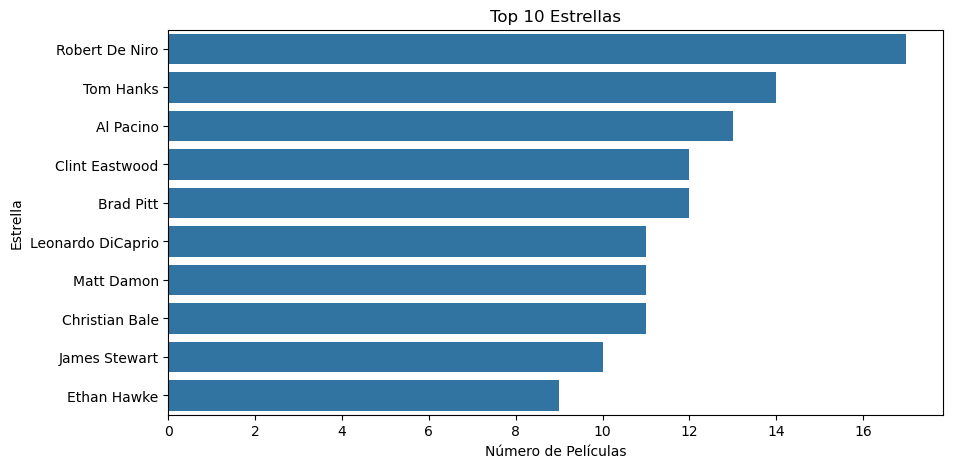

In [147]:
# Top 10 estrellas
top_stars = pd.concat([imdb_top_1000['Star1'], imdb_top_1000['Star2'], imdb_top_1000['Star3'], imdb_top_1000['Star4']])
top_stars = top_stars.value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_stars.values, y=top_stars.index)
plt.title('Top 10 Estrellas')
plt.xlabel('Número de Películas')
plt.ylabel('Estrella')
plt.show()


# 4.3 Análisis de Calificación y Votos  
## Analicemos la relación entre las calificaciones de IMDB y el número de votos.

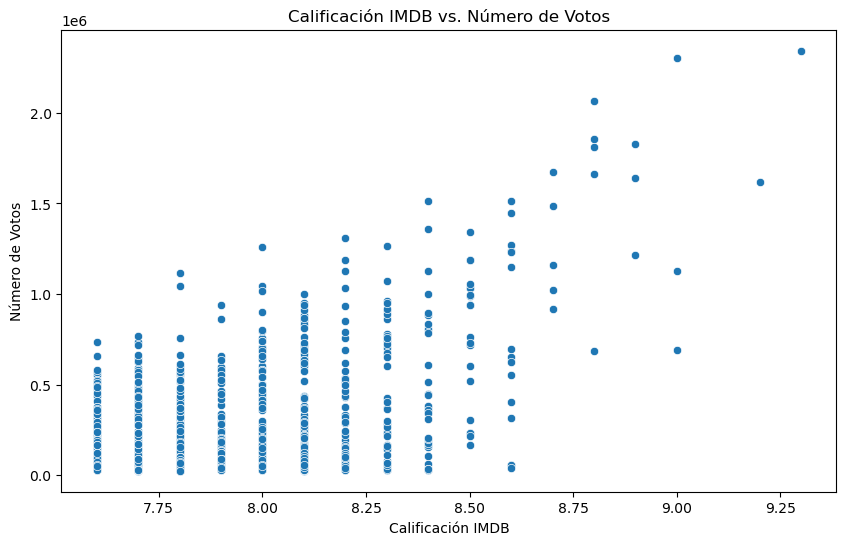

In [148]:
# Gráfico de dispersión de la Calificación IMDB vs. Número de Votos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='No_of_Votes', data=imdb_top_1000)
plt.title('Calificación IMDB vs. Número de Votos')
plt.xlabel('Calificación IMDB')
plt.ylabel('Número de Votos')
plt.show()

# 5. Modelado Predictivo
## ¿Podemos predecir el éxito de una película en función de sus características? Vamos a construir un modelo predictivo simple para averiguarlo.

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preparar los datos
features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes']
X = imdb_top_1000[features].fillna(0)
y = imdb_top_1000['IMDB_Rating']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


0.21039737403304276

# 6. Conclusión y Trabajo Futuro
En este cuaderno, exploramos el conjunto de datos de las 1000 mejores películas de IMDB, descubriendo información sobre géneros, directores y estrellas. También construimos un modelo predictivo simple para estimar las calificaciones de las películas en función de ciertas características. Aunque nuestro modelo proporciona un punto de partida, aún hay margen de mejora al incorporar más características y usar técnicas de modelado avanzadas.

El trabajo futuro podría involucrar:

Explorar el impacto de los subgéneros en el éxito de las películas.
Analizar la influencia de las tendencias del año de estreno.
Incorporar análisis de texto en las descripciones de las películas para análisis de sentimientos.

El analisis anterior realizado es de Devra AI en https://www.kaggle.com/code/devraai/imdb-top-1000-movie-secrets-and-predictions, vamos a proseguir completando el estudio con los apartados que deja sugeridos.

# 1. Explorar el impacto de los subgéneros en el éxito de las películas

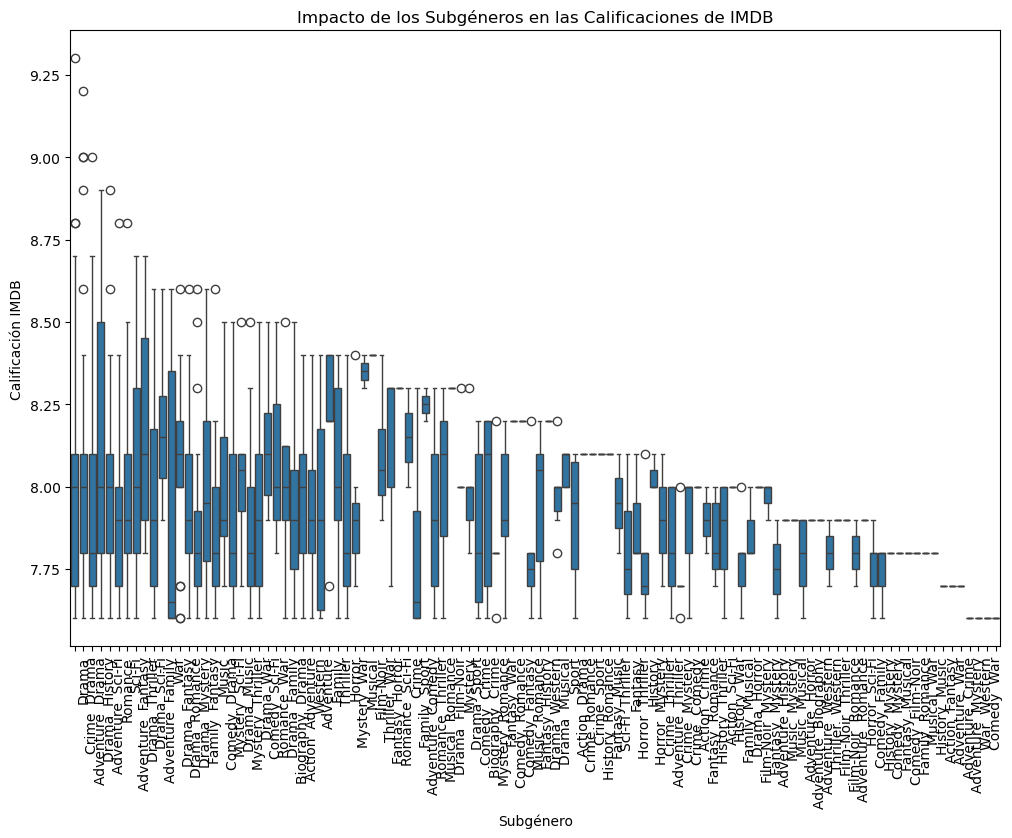

In [150]:
# Combinamos ambas columnas 'Subgenre' y 'Subgenre 1' en una sola columna para análisis
movies_data['All_Subgenres'] = movies_data['Subgenre'].fillna('') + ' ' + movies_data['Subgenre 1'].fillna('')
movies_data['All_Subgenres'] = movies_data['All_Subgenres'].str.strip()

# Analizar la relación entre subgéneros y las calificaciones de IMDB
plt.figure(figsize=(12, 8))
sns.boxplot(x='All_Subgenres', y='IMDB_Rating', data=movies_data)
plt.xticks(rotation=90)
plt.title('Impacto de los Subgéneros en las Calificaciones de IMDB')
plt.xlabel('Subgénero')
plt.ylabel('Calificación IMDB')
plt.show()


# 2. Analizar la influencia de las tendencias del año de estreno
Podemos analizar cómo las calificaciones de IMDB han cambiado a lo largo de los años de estreno en el dataset movies_data. Aquí usaremos la columna Released_Year de movies_data.

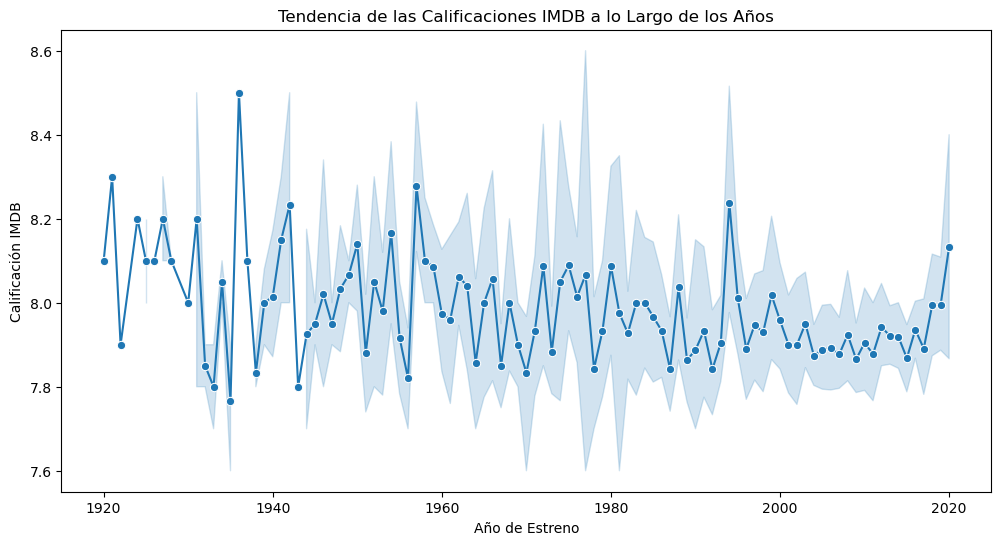

In [151]:
# Analizar las calificaciones IMDB a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=movies_data, marker='o')
plt.title('Tendencia de las Calificaciones IMDB a lo Largo de los Años')
plt.xlabel('Año de Estreno')
plt.ylabel('Calificación IMDB')
plt.show()


# 3. Análisis de Sentimiento en la descripción de las películas.

In [152]:
# Asegurarse de que TextBlob esté instalado
from textblob import TextBlob

# Función para calcular el sentimiento (polaridad)
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Aplicar la función de sentimiento a la columna 'Overview'
imdb_top_1000['Sentiment'] = imdb_top_1000['Overview'].apply(get_sentiment)

# Verificar las primeras filas con el sentimiento calculado
imdb_top_1000[['Series_Title', 'Sentiment']].head()


,Series_Title,Sentiment
0,The Shawshank Redemption,-0.300000
1,The Godfather,0.000000
2,The Dark Knight,0.333333
3,The Godfather: Part II,0.118182
4,12 Angry Men,0.000000


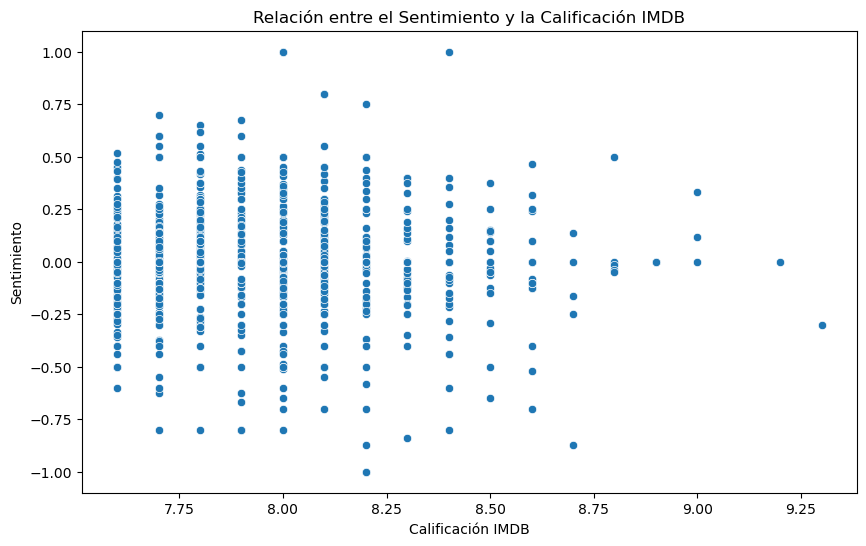

In [153]:
# Graficar la relación entre el Sentimiento y la Calificación IMDB
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Sentiment', data=imdb_top_1000)
plt.title('Relación entre el Sentimiento y la Calificación IMDB')
plt.xlabel('Calificación IMDB')
plt.ylabel('Sentimiento')
plt.show()


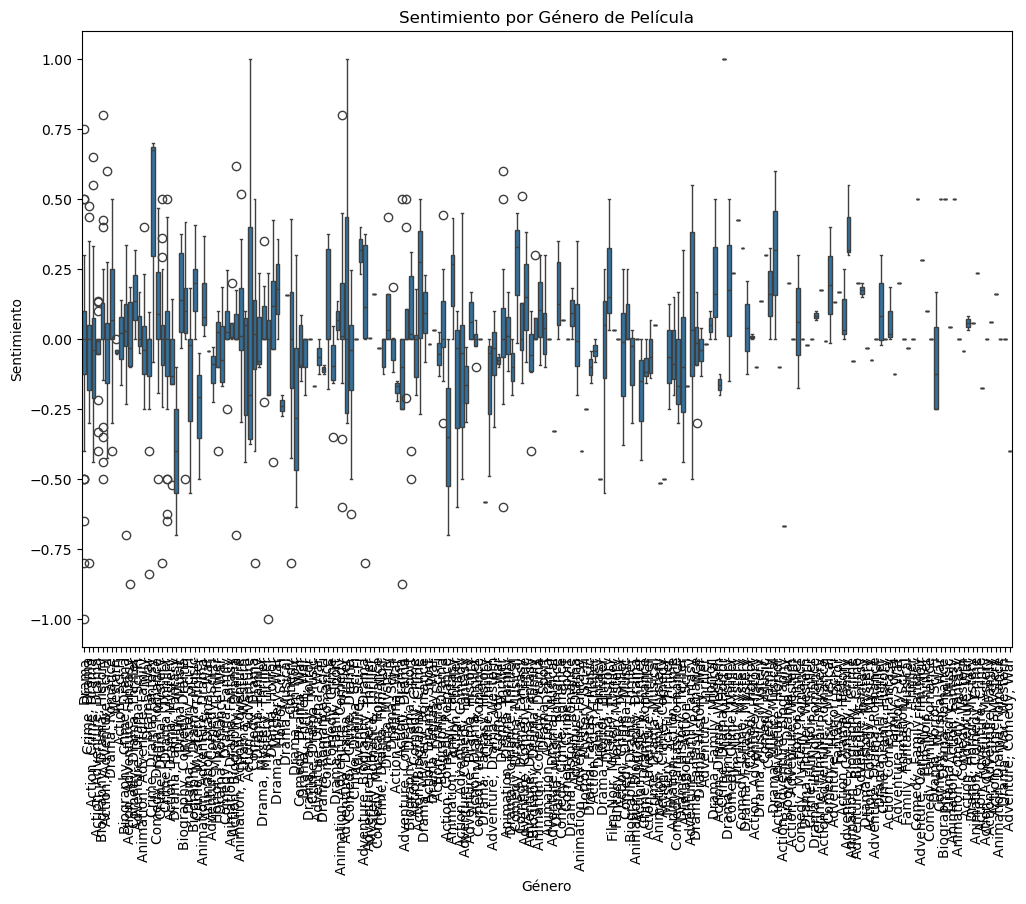

In [154]:
# Graficar el sentimiento por género
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Sentiment', data=imdb_top_1000)
plt.title('Sentimiento por Género de Película')
plt.xlabel('Género')
plt.ylabel('Sentimiento')
plt.xticks(rotation=90)
plt.show()
